C:\Users\dell\AppData\Local\Temp\ipykernel_2140\234609950.py:41: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-Z))


Iteration 0: Cost = 0.6024
Iteration 1000: Cost = 0.5999
Iteration 2000: Cost = 0.5999
Iteration 3000: Cost = 0.5999
Iteration 4000: Cost = 0.5999
Iteration 5000: Cost = 0.5999
Iteration 6000: Cost = 0.5999
Iteration 7000: Cost = 0.5999
Iteration 8000: Cost = 0.5999
Iteration 9000: Cost = 0.5999


C:\Users\dell\AppData\Local\Temp\ipykernel_2140\234609950.py:99: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(y_pred)


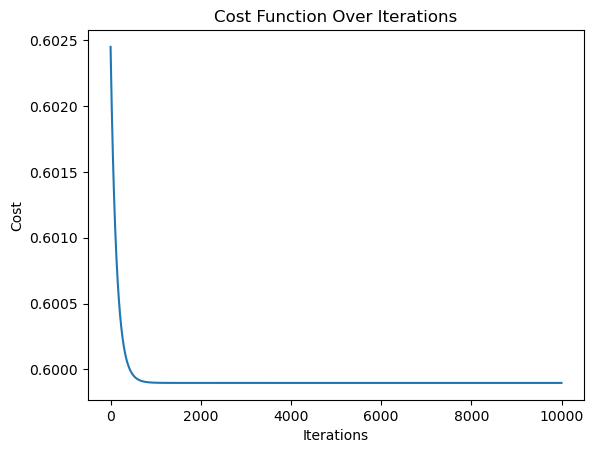

In [7]:
import numpy as np
import pandas as pd

np.random.seed(0)

num_samples = 400

threshold = 0.5


dataset = pd.read_csv("Social_Network_Ads.csv")

X = dataset.iloc[: , :-1].values
Y = dataset.iloc[: , -1].values

split_ratio = 0.8
split_index = int(num_samples * split_ratio)

x_train = X[:split_index].T  # Transpose the training data
x_test = X[split_index:].T   # Transpose the test data

y_train = Y[:split_index].T # Transpose the training labels
y_test = Y[split_index:].T   # Transpose the test labels

input_dim = 2
hidden_dim1 = 5
hidden_dim2 = 5
hidden_dim3 = 3
output_dim = 1

w1 = np.random.randn(hidden_dim1, input_dim)
b1 = np.zeros((hidden_dim1, 1))
w2 = np.random.randn(hidden_dim2, hidden_dim1)
b2 = np.zeros((hidden_dim2, 1))
w3 = np.random.randn(hidden_dim3, hidden_dim2)
b3 = np.zeros((hidden_dim3, 1))
w4 = np.random.randn(output_dim, hidden_dim3)
b4 = np.zeros((output_dim, 1))

def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def forward_propagation(X):
    z1 = np.dot(w1, X) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(w2, a1) + b2
    a2 = sigmoid(z2)
    z3 = np.dot(w3, a2) + b3
    a3 = sigmoid(z3)
    z4 = np.dot(w4, a3) + b4
    a4 = sigmoid(z4)
    return a1, a2, a3, a4  # Return all activation values

def backward_propagation(X, Y, cache):
    global w1, w2, w3, w4, b1, b2, b3, b4  # Declare all weight and bias variables as global
    m = X.shape[1]
    a1, a2, a3, a4 = cache
    dz4 = a4 - Y
    dw4 = (1/m) * np.dot(dz4, a3.T)
    db4 = (1/m) * np.sum(dz4, axis=1, keepdims=True)
    dz3 = np.dot(w4.T, dz4) * (a3 * (1 - a3))
    dw3 = (1/m) * np.dot(dz3, a2.T)
    db3 = (1/m) * np.sum(dz3, axis=1, keepdims=True)
    dz2 = np.dot(w3.T, dz3) * (a2 * (1 - a2))
    dw2 = (1/m) * np.dot(dz2, a1.T)
    db2 = (1/m) * np.sum(dz2, axis=1, keepdims=True)
    dz1 = np.dot(w2.T, dz2) * (a1 * (1 - a1))
    dw1 = (1/m) * np.dot(dz1, X.T)
    db1 = (1 / m) * np.sum(dz1, axis=1, keepdims=True)

    w4 -= learning_rate * dw4
    b4 -= learning_rate * db4
    w3 -= learning_rate * dw3
    b3 -= learning_rate * db3
    w2 -= learning_rate * dw2
    b2 -= learning_rate * db2
    w1 -= learning_rate * dw1
    b1 -= learning_rate * db1

learning_rate = 0.01
num_of_iterations = 10000



import matplotlib.pyplot as plt
costs = []
for i in range(num_of_iterations):
    cache = forward_propagation(x_train)
    cost = -np.mean(y_train * np.log(cache[3]) + (1 - y_train) * np.log(1 - cache[3]))
    costs.append(cost)  # Append the cost to the list
    backward_propagation(x_train, y_train, cache)
    if i % 1000 == 0:
        print(f"Iteration {i}: Cost = {cost:.4f}")




#from sklearn.metrics import confusion_matrix, accuracy_score
#cm = confusion_matrix(y_test, y_pred)
#accuracy_score(y_test, y_pred)

plt.plot(range(num_of_iterations), costs)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Over Iterations")
plt.show()



In [13]:
costs = []
for i in range(num_of_iterations):
    cache = forward_propagation(x_test)
    cost = -np.mean(y_test * np.log(cache[3]) + (1 - y_test) * np.log(1 - cache[3]))
    costs.append(cost)  # Append the cost to the list
    backward_propagation(x_test, y_test, cache)
    if i % 1000 == 0:
        print(f"Iteration {i}: Cost = {cost:.4f}")

C:\Users\dell\AppData\Local\Temp\ipykernel_2140\234609950.py:41: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-Z))


Iteration 0: Cost = 0.6548
Iteration 1000: Cost = 0.6548
Iteration 2000: Cost = 0.6548
Iteration 3000: Cost = 0.6548
Iteration 4000: Cost = 0.6548
Iteration 5000: Cost = 0.6548
Iteration 6000: Cost = 0.6548
Iteration 7000: Cost = 0.6548
Iteration 8000: Cost = 0.6548
Iteration 9000: Cost = 0.6548
